<a href="https://colab.research.google.com/github/MuzMoh/Water-Quality-Monitoring-for-Waterborne-Diseases-Prediction-using-Machine-Learning-/blob/main/Water_Quality_Monitoring_for_Waterborne_Diseases_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data Pre-processing and Visualisation
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

#Data Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Data Modelling
import keras
import sklearn
from sklearn import svm
from sklearn.svm import SVC
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Dropout, Activation


#Model Evaluation
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

In [ ]:
sklearn. __version__ 

'0.22.2.post1'

In [ ]:
tf. __version__

'2.6.0'

In [ ]:
keras. __version__ 

'2.6.0'

# **Data Exploration**





In [ ]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/FYP/water_dataX.csv", encoding= 'unicode_escape')
df.shape

(1988, 12)

In [ ]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [ ]:
# Checking for datatypes of the dataset
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [ ]:
# Changing column names
df = df.rename(columns={"LOCATIONS": "Address", "STATE": "Location", "D.O. (mg/l)": "DO", "CONDUCTIVITY (µmhos/cm)": "Conductivity", 
                        "B.O.D. (mg/l)": "BOD", "NITRATENAN N+ NITRITENANN (mg/l)": "NI", 
                        "FECAL COLIFORM (MPN/100ml)": "Fec_col", "TOTAL COLIFORM (MPN/100ml)Mean": "Tot_col"})

In [ ]:
df.describe()

,year
count,1988.000000
mean,2010.038732
std,3.054118
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


# **Data Cleaning/Pre-processing**

In [ ]:
# Converting object data type to numeric
def convert_to_numeric(df):
    num_col = df.shape[1]
    # Start from index 3
    for index in range(3, num_col):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

df = convert_to_numeric(df)
df.dtypes

STATION CODE     object
Address          object
Location         object
Temp            float64
DO              float64
PH              float64
Conductivity    float64
BOD             float64
NI              float64
Fec_col         float64
Tot_col         float64
year              int64
dtype: object

In [ ]:
df.shape[1]

12

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values()

STATION CODE      0
Address           0
Location          0
year              0
PH                5
Conductivity     22
DO               28
BOD              40
Temp             89
Tot_col         129
NI              222
Fec_col         313
dtype: int64

In [ ]:
# Replacing string NAN values with actual NAN value (np.nan)
def convert_to_nan(df):
    n_col = df.shape[1]
    for index in range(n_col):
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values()

year              0
PH                5
Conductivity     22
DO               28
BOD              40
Temp             89
STATION CODE    119
Tot_col         129
Address         181
NI              222
Fec_col         313
Location        758
dtype: int64

In [ ]:
# Replacing NULL values with median of column in numeric columns
df_num = df.select_dtypes(exclude="object")
df_num_col = df_num.columns
imputer = SimpleImputer(strategy="median")

df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [ ]:
# Checking for missing values in categorical columns
df_cat = df.select_dtypes(include="object")
df_cat.isnull().sum()

STATION CODE    119
Address         181
Location        758
dtype: int64

In [ ]:
# Here we can fill these values by obeserving other attributes
# Example - 
pd.set_option('mode.chained_assignment', None)
df_cat_copy = df_cat.copy()

# STATION CODE with value 1330 belong in LOCATION - TAMIL NADU
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,Address,Location
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
423,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
675,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1166,1330,TAMBIRAPARANI AT ARUMUGANERI,NaN
1349,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1511,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1624,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1743,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1983,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [ ]:
# I can replace all the NAN occurences in LOCATION with TAMILNADU
df_cat_copy["Location"][df_cat_copy["STATION CODE"] == "1330"] = df_cat_copy["Location"][df_cat_copy["STATION CODE"] == "1330"].fillna("TAMILNADU")

df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,Address,Location
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
423,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
675,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1166,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1349,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1511,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1624,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1743,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1983,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [ ]:
# The NULL values in ADDRESS attribute are in LOCATION attribute (ex - above output)
# So, I will fill the NULL values in ADDRESS attribute with the corresponding LOCATION value

def fill_address(df_cat):
    address_null = df_cat[df_cat["Address"].isnull()]
    address_null_indices = address_null.index
    for index in address_null_indices:
        location_value = address_null["Location"][index]
        address_null["Address"][index] = location_value
        address_null["Location"][index] = np.nan
    df_cat[df_cat["Address"].isnull()] = address_null
    return

fill_address(df_cat_copy)
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,Address,Location
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
423,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
675,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1166,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1349,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1511,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1624,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1743,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1983,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [ ]:
df_cat_copy[df_cat_copy["STATION CODE"] == "17"]

,STATION CODE,Address,Location
118,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
375,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
627,17,PERIYAR NEAR ALWAYENANELOOR,KERALA
915,17,PERIYAR NEAR ALWAYENANELOOR,KERALA
1095,17,PERIYAR NEAR ALWAYENANELOOR,NaN
1265,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1439,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1584,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1705,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1923,17,"PERIYAR AT ALWAYE, KERALA",NaN


In [ ]:
df_cat_copy[df_cat_copy["Address"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,Address,Location
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
423,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1349,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1511,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1624,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1743,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1894,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1983,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [ ]:
# Now I can fill NULL values of STATION CODE with corresponding ADDRESS value(ex - above dataframe)
# I will match the corresponding similar ADDRESS values to fill in the STATION CODE 

def fill_code(df_cat):
    station_null = df_cat[df_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        address_index = station_null["Address"][index]
        code_at_address = df_cat["STATION CODE"][df_cat["Address"] == address_index]
        for index_code in code_at_address.index:
            if (code_at_address[index_code] != np.nan):
                stat_code = code_at_address[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    df_cat[df_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(df_cat_copy)
df_cat_copy[df_cat_copy["Address"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,Address,Location
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
423,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1349,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1511,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1624,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1743,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1894,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1983,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [ ]:
df_cat_copy[df_cat_copy["STATION CODE"] == "17"]

,STATION CODE,Address,Location
118,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
375,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
627,17,PERIYAR NEAR ALWAYENANELOOR,KERALA
915,17,PERIYAR NEAR ALWAYENANELOOR,KERALA
1095,17,PERIYAR NEAR ALWAYENANELOOR,NaN
1265,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1439,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1584,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1705,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN
1811,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",NaN


In [ ]:
# Filling all LOCATION NAN values which have corresponding STATION CODE values
def fill_location(df_cat):
    station_code = df_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_location = df_cat["Location"][df_cat["STATION CODE"] == station_code[index]] 
            location_values = df_cat["Location"][df_cat["STATION CODE"] == station_code[index]]
            location = np.nan
            for index_location in range(location_values.shape[0]):
                if (location_values.iloc[index_location] != np.nan):
                    location = location_values.iloc[index_location]
                    break
            df_location_fill = df_location.fillna(location) 
            df_cat["Location"][df_cat["STATION CODE"] == station_code[index]] = df_location_fill
    return

    
fill_location(df_cat_copy)
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,Address,Location
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
423,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
675,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1166,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1349,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1511,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1624,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1743,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1894,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1983,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [ ]:
# Checking to see if other previously NULL values were also filled up
df_cat_copy[df_cat_copy["STATION CODE"] == "17"]

,STATION CODE,Address,Location
118,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
375,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
627,17,PERIYAR NEAR ALWAYENANELOOR,KERALA
915,17,PERIYAR NEAR ALWAYENANELOOR,KERALA
1095,17,PERIYAR NEAR ALWAYENANELOOR,KERALA
1265,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
1439,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
1584,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
1705,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA
1811,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA


In [ ]:
# Checking NULL values after imputation
df_cat_copy.isnull().sum()

STATION CODE     2
Address          0
Location        10
dtype: int64

In [ ]:
df_cat_copy[df_cat_copy["Location"].isnull()]

,STATION CODE,Address,Location
1104,1207,KABBANI AT MUTHANKARA,NaN
1105,1208,BHAVANI AT ELACHIVAZHY,NaN
1648,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1649,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1650,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1768,2047,NNANCHOE (ATTAWA CHOE),NaN
1769,2048,PATIALA KI RAO,NaN
1770,2049,SUKHNA CHOE,NaN
1782,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",NaN
1783,NaN,"DAMANGANGA AT CIRCUIT HOUSE, SILVASA, DADRA AN...",NaN


In [ ]:
df_cat_copy[df_cat_copy["STATION CODE"] == "1207"]

,STATION CODE,Address,Location
1104,1207,KABBANI AT MUTHANKARA,NaN


In [ ]:
df_cat_copy[df_cat_copy["STATION CODE"] == "1208"]

,STATION CODE,Address,Location
1105,1208,BHAVANI AT ELACHIVAZHY,NaN


In [ ]:
df_cat_copy[df_cat_copy["STATION CODE"] == "2047"]

,STATION CODE,Address,Location
1648,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1768,2047,NNANCHOE (ATTAWA CHOE),NaN


In [ ]:
df_cat_copy[df_cat_copy["STATION CODE"] == "2048"]

,STATION CODE,Address,Location
1649,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1769,2048,PATIALA KI RAO,NaN


In [ ]:
df_cat_copy[df_cat_copy["STATION CODE"] == "2049"]

,STATION CODE,Address,Location
1650,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2049,SUKHNA CHOE,NaN


In [ ]:
# Filling up LOCATION based on ADDRESS
df_cat_copy["Location"][1649] = "CHANDIGARH"
df_cat_copy["Location"][1650] = "CHANDIGARH"
df_cat_copy["Location"][1769] = "CHANDIGARH"
df_cat_copy["Location"][1770] = "CHANDIGARH"
df_cat_copy["Location"][2047] = "CHANDIGARH"

In [ ]:
# Re-checking NULL values
df_cat = df_cat_copy
df_cat.isnull().sum()

STATION CODE    2
Address         0
Location        6
dtype: int64

In [ ]:
df_cat_copy[df_cat_copy["Location"].isnull()]

,STATION CODE,Address,Location
1104,1207,KABBANI AT MUTHANKARA,NaN
1105,1208,BHAVANI AT ELACHIVAZHY,NaN
1648,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1768,2047,NNANCHOE (ATTAWA CHOE),NaN
1782,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",NaN
1783,NaN,"DAMANGANGA AT CIRCUIT HOUSE, SILVASA, DADRA AN...",NaN


In [ ]:
df_num.isnull().sum()

Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [ ]:
# Combining categorical and numerical dataframes into one after pre-processing and checking for NULL total
df_final = pd.concat([df_cat, df_num], axis=1)
df_final.isnull().sum()

STATION CODE    2
Address         0
Location        6
Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [ ]:
# These are the samples which don't contain any attribute that I can use to fill in the NULL values
# So it is best to remove them

df_null = df_final[(df_final["STATION CODE"].isnull()) | (df_final["Location"].isnull())]
df_null_indices = df_null.index
df_final.drop(df_null_indices, axis=0, inplace=True)
df_null

,STATION CODE,Address,Location,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
1104,1207,KABBANI AT MUTHANKARA,NaN,24.3,6.8,7.3,67.0,0.6,0.40,598.0,935.0,2010.0
1105,1208,BHAVANI AT ELACHIVAZHY,NaN,25.8,7.3,7.4,104.0,0.6,0.44,245.0,430.0,2010.0
1648,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN,29.0,6.7,7.2,183.0,50.0,0.27,221.0,468.0,2007.0
1768,2047,NNANCHOE (ATTAWA CHOE),NaN,26.0,0.6,7.3,646.0,87.0,6.80,221.0,468.0,2006.0
1782,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",NaN,27.0,6.7,7.3,183.0,1.0,1.01,1200.0,37000.0,2005.0
1783,NaN,"DAMANGANGA AT CIRCUIT HOUSE, SILVASA, DADRA AN...",NaN,27.0,6.7,7.3,183.0,112.0,5.50,1200000.0,6400000.0,2005.0


In [ ]:
# Final checking of NULL values
df_final.isnull().sum()

STATION CODE    0
Address         0
Location        0
Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [ ]:
# Checking dataframe shape after removing NULL values
df_final.shape

(1982, 12)

In [ ]:
df_final.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1.982000e+03,1982.000000
mean,26.244368,6.398773,112.143545,1773.386948,6.732530,1.496715,3.058039e+05,4.973489e+05,2010.047427
std,3.298198,1.319359,1879.403418,5531.699048,28.986124,3.873670,8.058092e+06,1.378527e+07,3.052423
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,2003.000000
25%,25.000000,5.900000,6.900000,79.000000,1.200000,0.278500,4.100000e+01,1.162500e+02,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02,2011.000000
75%,28.300000,7.200000,7.700000,570.875000,3.600000,1.200000,6.292500e+02,1.698250e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000


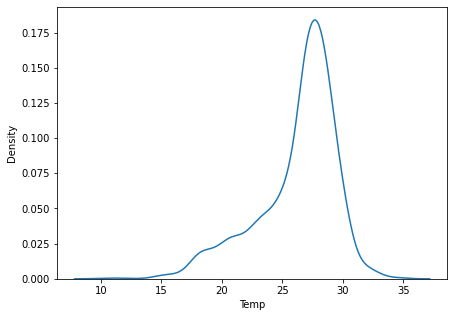

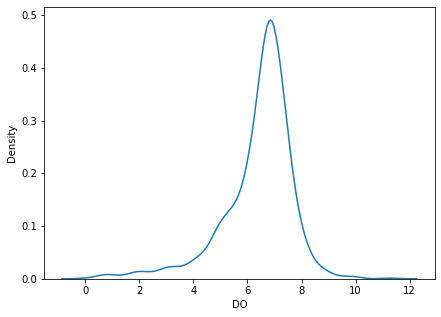

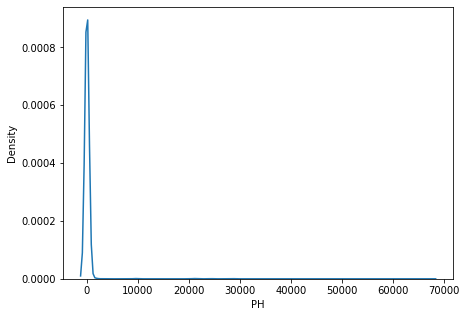

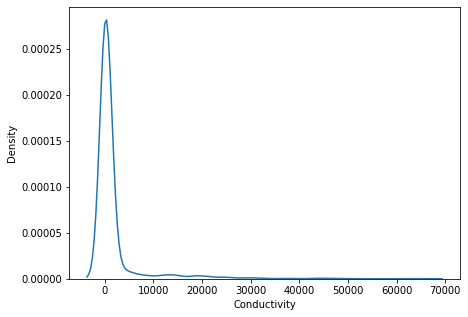

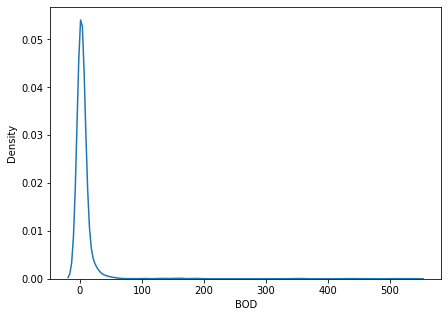

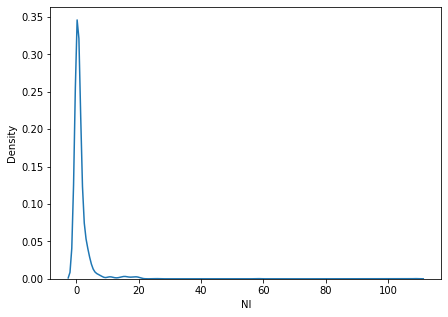

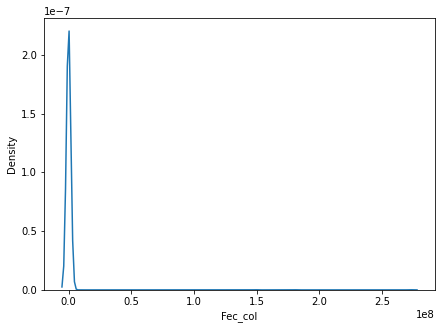

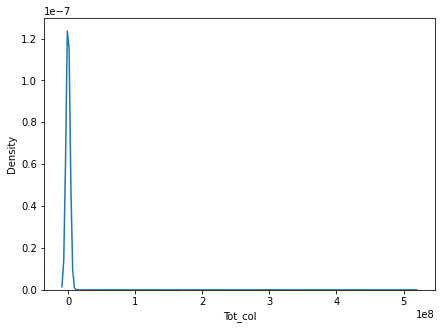

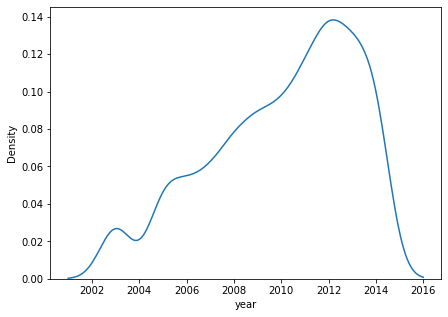

In [ ]:
# PLotting   the numeric attributes in the dataset

df_num_final = df_final.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [ ]:
# Removing outliers using z-score
z = np.abs(zscore(df_num_final))
print(z)

[[1.32094315e+00 2.28370782e-01 5.56931805e-02 ... 3.79581309e-02
  3.60854368e-02 1.29522378e+00]
 [1.07832521e+00 5.29764276e-01 5.58528459e-02 ... 3.73446796e-02
  3.54785490e-02 1.29522378e+00]
 [9.87343477e-01 7.48832413e-02 5.60125113e-02 ... 3.75569422e-02
  3.57006537e-02 1.29522378e+00]
 ...
 [5.32434836e-01 9.10692335e-01 7.52744973e-03 ... 3.79320636e-02
  3.60460370e-02 2.30938037e+00]
 [5.32434836e-01 9.86505841e-01 1.12529759e-02 ... 3.79320636e-02
  3.60466175e-02 2.30938037e+00]
 [8.35707263e-01 9.10692335e-01 1.14083349e-03 ... 3.79320636e-02
  3.60477784e-02 2.30938037e+00]]


In [ ]:
# Adding the z_score for each row into the dataframe
df_final['z_score'] = z.tolist()

In [ ]:
df_final

,STATION CODE,Address,Location,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,z_score
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0,"[1.3209431470362394, 0.2283707822320747, 0.055..."
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0,"[1.0783252051158518, 0.5297642764983976, 0.055..."
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0,"[0.9873434768957065, 0.0748832412601145, 0.056..."
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0,"[1.0479979623758031, 0.4539507706253506, 0.056..."
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0,"[0.9873434768957065, 0.4539507706253506, 0.055..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0,"[0.22916240839449617, 1.1381328527086416, 0.33..."
1984,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0,"[0.8357072631954644, 0.8348788292164524, 0.251..."
1985,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0,"[0.5324348357949803, 0.9106923350894993, 0.007..."
1986,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0,"[0.5324348357949803, 0.9865058409625469, 0.011..."


In [ ]:
df_num_final_o = df_final[(z < 3).all(axis=1)]

In [ ]:
df_num_final_o.drop(['z_score'], axis=1, inplace=True)

In [ ]:
df_num_final_o.shape

(1811, 12)

In [ ]:
df_final = df_num_final_o

In [ ]:
df_final.shape

(1811, 12)

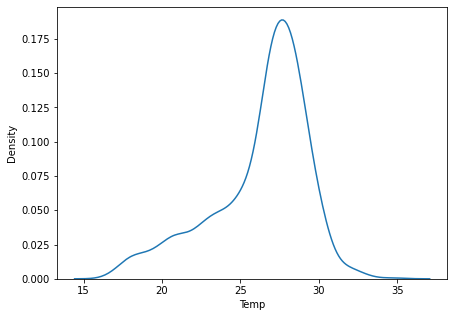

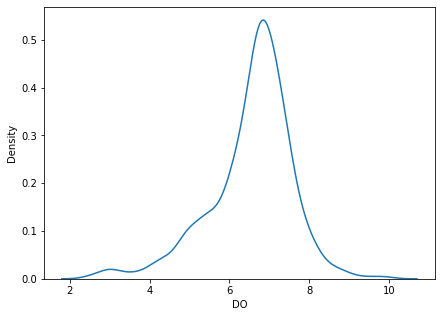

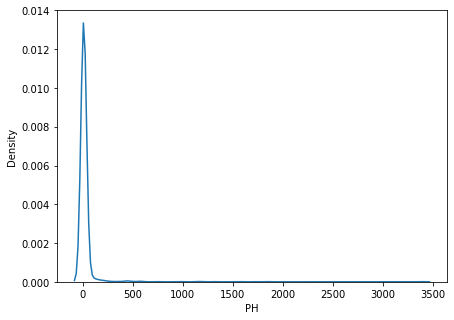

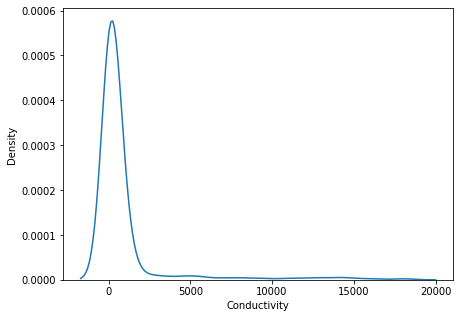

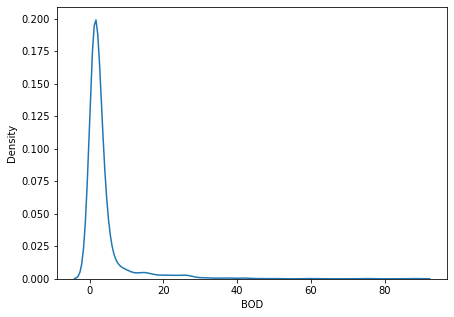

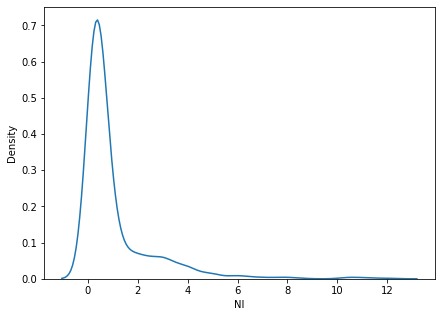

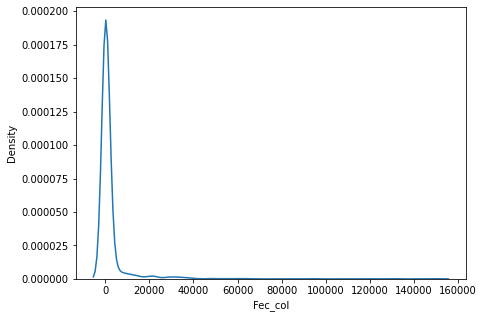

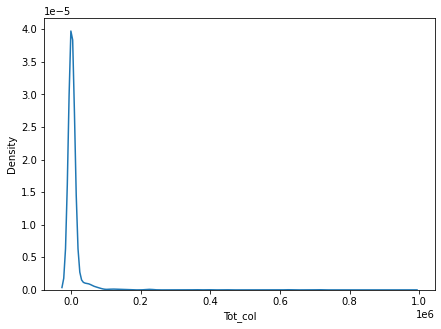

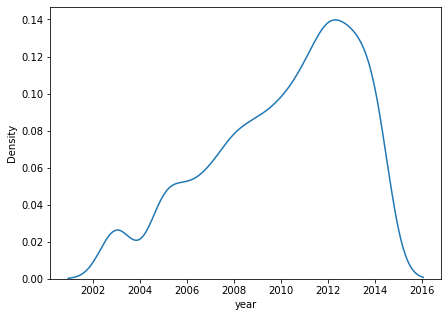

In [ ]:
# KDE plots after removal of outliers
plot_kde(df_final.select_dtypes(exclude="object"))

# **Water Quality Index Calculation**

I will be using "Weighted Arithmetic Water Quality Index Method" to calculate WQI of each water sample. The formula to calculate WQI is -

> *WQI = ∑ qi × wi*

qi - Quality estimate scale of each parameter, it is calculated with the formula - 
> *qi = 100 × ( Vi / Si)*



wi is calculated by the formula -
> *wi = K / Si*


Here K is proportionality constant which is -
> *K = 1 / ∑ (1/Si)*



### **Unit weights for each parameter (wi) -**
Dissolved Oxygen =  0.2213

pH = 0.2604

Conductivity = 0.0022

Biological Oxygen Demand = 0.4426

Nitrate = 0.0492

Fecal Coliform = 0.0221

Total Coliform = 0.0022

### **Standard value recommended for each parameter (Si) -**
Dissolved oxygen(mg/L) = 10

pH = 8.5

Conductivity (µS/cm) = 1000

Biological oxygen demand (mg/L) = 5

Nitrate (mg/L) = 45

Fecal coliform/100 mL = 100

Total coliform/100 mL = 1000

### **Ideal value of each parameters (Videal) -**
Dissolved Oxygen = 14.6

pH = 7.0

Conductivity = 0

Biological Oxygen Demand = 0

Nitrate = 0

Fecal Coliform = 0

Total Coliform = 0

In [ ]:
# Calculating Water Quality Index of each sample
df_num_final = df_final.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample):
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index) / (std_index)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [ ]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [ ]:
wqi_arr = calc_wqi_for_df(df_num_final)

# Converting ordinary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [ ]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1811, 13)

In [ ]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,Address,Location,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI


In [ ]:
# These are samples with WQI over 100
df_wqi[(df_wqi["WQI"] > 100)]

,STATION CODE,Address,Location,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014.0,163.746278
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014.0,123.021866
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014.0,188.479760
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014.0,129.048758
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.100,2853.000,4049.0,2014.0,112.090451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003.0,2302.381912
1807,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003.0,1831.868464
1808,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2,0.516,221.000,570.0,2003.0,332.734362
1809,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3,0.516,221.000,562.0,2003.0,312.394462


In [ ]:
# Removing the samples with negative WQI
df_pol_indices = df_wqi[(df_wqi["WQI"] > 100)].index
df_wqi.drop(df_pol_indices, axis=0, inplace=True)

      WQI Range                   Classification

     Less than 25                  Very Poor(0)
        26–50                         Poor(1)
        51-75                         Good(2)
    Greater than 75                 Excellent(3)

    https://www.omicsonline.org/open-access/assessment-of-water-quality-index-wqi-of-groundwater-in-rajkotdistrict-gujarat-india-2157-7617-1000341.php?aid=71110#:~:text=Based%20on%20the%20status%20of,is%20presented%20in%20Table%202.

In [ ]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (0 if (x <= 25)  
                                        else(1 if (26<=x<=50) 
                                        else(2 if (51<=x<=75) 
                                        else 3))))

In [ ]:
df_wqi.tail()

,STATION CODE,Address,Location,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf
1725,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,6.6,7.81,603.2,2.675,0.263,40.0,191.0,2005.0,63.298543,2
1726,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.0,6.6,7.49,571.5,2.091,0.256,151.0,273.0,2005.0,59.612047,2
1727,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,5.4,7.16,75.8,2.092,0.516,404.0,513.0,2005.0,61.517807,2
1728,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,30.0,5.4,7.37,104.8,1.802,0.215,456.0,557.0,2005.0,60.726418,2
1729,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",TRIPURA,29.0,5.3,7.37,102.2,2.552,0.202,526.0,583.0,2005.0,68.694845,2


In [ ]:
df_wqi.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.00000,1408.000000,1408.000000
mean,26.570579,6.692784,7.170445,884.580398,1.922930,0.829538,300.950817,734.274858,2010.43750,60.897632,1.995028
std,2.810339,0.943856,0.686214,2628.375319,1.234823,1.134430,419.125502,2112.274087,2.62573,12.762681,0.634792
min,17.000000,2.500000,0.000000,11.000000,0.100000,0.000000,0.000000,0.000000,2005.00000,33.006778,1.000000
25%,25.300000,6.300000,6.873000,75.000000,1.000000,0.240000,28.000000,77.000000,2008.00000,51.208850,2.000000
50%,27.000000,6.800000,7.200000,143.000000,1.600000,0.500000,212.500000,336.000000,2011.00000,57.734314,2.000000
75%,28.200000,7.200000,7.600000,316.000000,2.400000,0.822500,303.000000,775.000000,2013.00000,69.420240,2.000000
max,35.000000,10.000000,9.010000,18291.000000,7.800000,11.000000,2367.000000,66382.000000,2014.00000,99.780975,3.000000


In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df_wqi['WQI clf']

0       2
11      3
15      3
16      3
18      3
       ..
1725    2
1726    2
1727    2
1728    2
1729    2
Name: WQI clf, Length: 1408, dtype: int64

In [ ]:
df_wqi["Is_Potable"] = df_wqi["WQI clf"].apply(lambda x: (1 if (x == 2 | x == 3)
                                        else(0)))

In [ ]:
df_wqi

,STATION CODE,Address,Location,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf,Is_Potable
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.50,203.0,1.8965,0.100,11.0,27.0,2014.0,54.896022,2,0
11,1548,"RIVER ASSONORA AT ASSONORA, GOA",GOA,27.9,6.7,6.40,93.0,1.4000,0.100,2147.0,3433.0,2014.0,95.061842,3,1
15,1546,"RIVER KHANDEPAR AT OPA NAN PONDA, GOA",GOA,29.0,7.3,7.00,247.0,1.5000,0.200,1095.0,2453.0,2014.0,75.692973,3,1
16,2270,"RIVER KHANDEPAR AT CODLI NEAR BRIDGE ,U/S OPA ...",GOA,29.1,7.3,7.00,188.0,1.0000,0.100,1286.0,3048.0,2014.0,75.595059,3,1
18,1545,"RIVER MADAI AT DABOS NAN VALPOI, GOA",GOA,28.7,7.3,6.70,144.0,1.5000,0.100,1940.0,3052.0,2014.0,93.546600,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,6.6,7.81,603.2,2.6750,0.263,40.0,191.0,2005.0,63.298543,2,0
1726,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.0,6.6,7.49,571.5,2.0910,0.256,151.0,273.0,2005.0,59.612047,2,0
1727,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,5.4,7.16,75.8,2.0920,0.516,404.0,513.0,2005.0,61.517807,2,0
1728,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,30.0,5.4,7.37,104.8,1.8020,0.215,456.0,557.0,2005.0,60.726418,2,0


In [ ]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df_wqi.to_csv('cleaned_data.csv')

In [ ]:
df = pd.read_csv("/content/cleaned_data.csv", encoding= 'unicode_escape')
df.shape

(1408, 16)

In [ ]:
df.isnull().sum().sort_values()

Unnamed: 0      0
STATION CODE    0
Address         0
Location        0
Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
WQI             0
WQI clf         0
Is_Potable      0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,STATION CODE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf,Is_Potable
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.00000,1408.000000,1408.000000,1408.000000
mean,866.314631,1982.030540,26.570579,6.692784,7.170445,884.580398,1.922930,0.829538,300.950817,734.274858,2010.43750,60.897632,1.995028,0.198864
std,485.016233,776.796564,2.810339,0.943856,0.686214,2628.375319,1.234823,1.134430,419.125502,2112.274087,2.62573,12.762681,0.634792,0.399287
min,0.000000,2.000000,17.000000,2.500000,0.000000,11.000000,0.100000,0.000000,0.000000,0.000000,2005.00000,33.006778,1.000000,0.000000
25%,460.750000,1444.000000,25.300000,6.300000,6.873000,75.000000,1.000000,0.240000,28.000000,77.000000,2008.00000,51.208850,2.000000,0.000000
50%,857.500000,1925.000000,27.000000,6.800000,7.200000,143.000000,1.600000,0.500000,212.500000,336.000000,2011.00000,57.734314,2.000000,0.000000
75%,1282.750000,2445.000000,28.200000,7.200000,7.600000,316.000000,2.400000,0.822500,303.000000,775.000000,2013.00000,69.420240,2.000000,0.000000
max,1729.000000,3473.000000,35.000000,10.000000,9.010000,18291.000000,7.800000,11.000000,2367.000000,66382.000000,2014.00000,99.780975,3.000000,1.000000


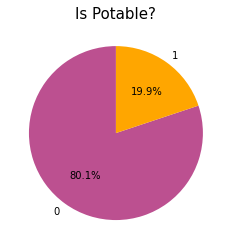

In [ ]:
colors = ['#BC5090','#FFA600']
plt.figure(figsize=(4,4))
label = df_wqi['Is_Potable'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('Is Potable?', fontsize=15)
plt.show()

In [ ]:
df_wqi['Is_Potable'].value_counts()

0    1128
1     280
Name: Is_Potable, dtype: int64

In [ ]:
sc_x = MinMaxScaler()
X = pd.DataFrame(sc_x.fit_transform(df_wqi.drop(["Temp", "Is_Potable", "STATION CODE",	"Address",	
                                                 "Location", "WQI",	"WQI clf", "year"],axis = 1),), 
                 columns=['DO','PH','Conductivity','BOD','NI','Fec_col','Tot_col'])

In [ ]:
X

,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col
0,0.560000,0.832408,0.010503,0.233312,0.009091,0.004647,0.000407
1,0.560000,0.710322,0.004486,0.168831,0.009091,0.907055,0.051716
2,0.640000,0.776915,0.012910,0.181818,0.018182,0.462611,0.036953
3,0.640000,0.776915,0.009683,0.116883,0.009091,0.543304,0.045916
4,0.640000,0.743618,0.007276,0.181818,0.009091,0.819603,0.045976
...,...,...,...,...,...,...,...
1403,0.546667,0.866815,0.032396,0.334416,0.023909,0.016899,0.002877
1404,0.546667,0.831299,0.030662,0.258571,0.023273,0.063794,0.004113
1405,0.386667,0.794673,0.003545,0.258701,0.046909,0.170680,0.007728
1406,0.386667,0.817980,0.005131,0.221039,0.019545,0.192649,0.008391


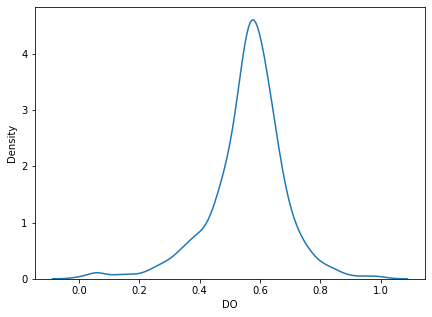

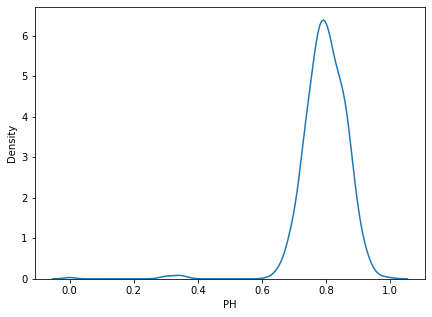

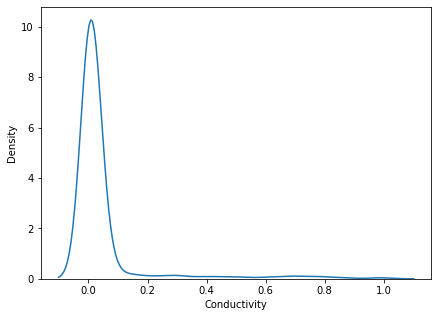

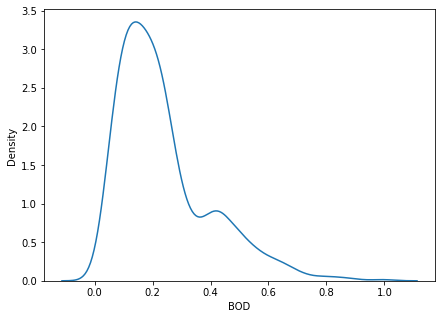

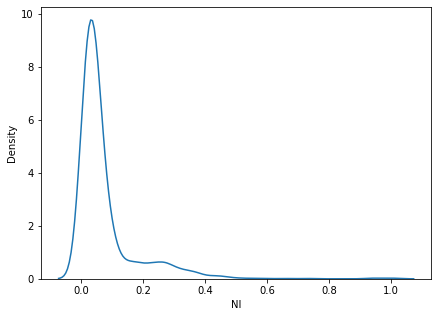

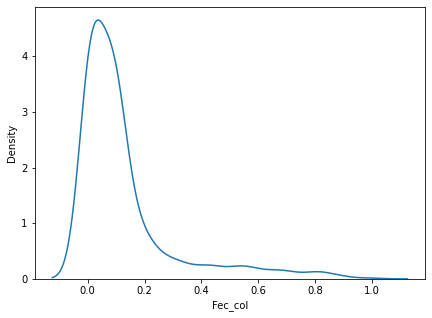

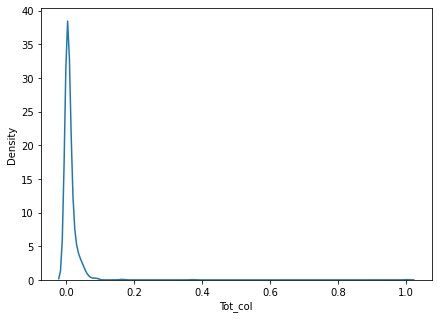

In [ ]:
# KDE plots after removal of outliers
plot_kde(X.select_dtypes(exclude="object"))

In [ ]:
X.describe()

,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000
mean,0.559038,0.795832,0.047789,0.236744,0.075413,0.127144,0.011061
std,0.125847,0.076161,0.143784,0.160367,0.103130,0.177070,0.031820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.506667,0.762819,0.003501,0.116883,0.021818,0.011829,0.001160
50%,0.573333,0.799112,0.007221,0.194805,0.045455,0.089776,0.005062
75%,0.626667,0.843507,0.016685,0.298701,0.074773,0.128010,0.011675
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


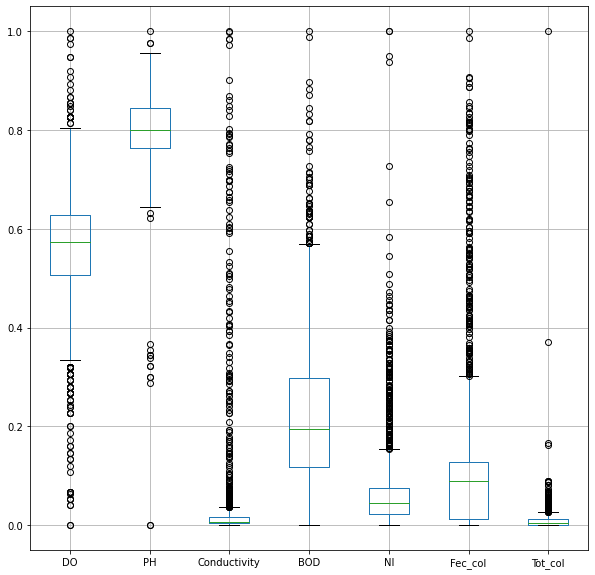

In [ ]:
X.boxplot(figsize=(10,10))

In [ ]:
#split data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(X, df_wqi['Is_Potable'], test_size = 0.3, random_state = 100)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

985
423
985
423


In [ ]:
# import library
from imblearn.over_sampling import SMOTE
over = SMOTE()

# fit predictor and target variable
x_smote, y_smote = over.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_smote.shape)
print(y_smote.shape)

(1592, 7)
(1592,)


In [ ]:
from collections import Counter

print(Counter(y_smote))

Counter({0: 796, 1: 796})


# **Model Building**

In [ ]:
SVM = svm.SVC()
SVM_pred = SVM.fit(x_smote, y_smote).predict(X_test)
SVM_Report = classification_report(y_test, SVM_pred, digits=4)
print(SVM_Report)

              precision    recall  f1-score   support

           0     0.9620    0.9157    0.9383       332
           1     0.7383    0.8681    0.7980        91

    accuracy                         0.9054       423
   macro avg     0.8502    0.8919    0.8681       423
weighted avg     0.9139    0.9054    0.9081       423



In [ ]:
model = Sequential()
model.add(Embedding(7, 128))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_smote, y_smote, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
50/50 [==============================] - 3s 22ms/step - loss: 0.6942 - accuracy: 0.4969 - val_loss: 0.7228 - val_accuracy: 0.2151
Epoch 2/50
50/50 [==============================] - 1s 13ms/step - loss: 0.6939 - accuracy: 0.4899 - val_loss: 0.6921 - val_accuracy: 0.7872
Epoch 3/50
50/50 [==============================] - 1s 13ms/step - loss: 0.6939 - accuracy: 0.5044 - val_loss: 0.6933 - val_accuracy: 0.2151
Epoch 4/50
50/50 [==============================] - 1s 13ms/step - loss: 0.6943 - accuracy: 0.4711 - val_loss: 0.6893 - val_accuracy: 0.7872
Epoch 5/50
50/50 [==============================] - 1s 14ms/step - loss: 0.6940 - accuracy: 0.4730 - val_loss: 0.6916 - val_accuracy: 0.7872
Epoch 6/50
50/50 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.4981 - val_loss: 0.6881 - val_accuracy: 0.7872
Epoch 7/50
50/50 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.4856 - val_loss: 0.6932 - val_accuracy: 0.2151
Epoch 8/50
50

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Evaluation 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R square:', r2_score(y_test, y_pred))

report = classification_report(y_test, y_pred, digits = 4)
print(report)

Mean Squared Error: 0.21513002364066194
R square: -0.27409638554216853
              precision    recall  f1-score   support

           0     0.7862    0.9970    0.8792       332
           1     0.5000    0.0110    0.0215        91

    accuracy                         0.7849       423
   macro avg     0.6431    0.5040    0.4503       423
weighted avg     0.7246    0.7849    0.6946       423



# **Optimised Models**

### Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV
SVM_hyp2 = [{'kernel': ['rbf', 'linear', 'sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]
grid = GridSearchCV(SVC(), SVM_hyp2, verbose = 3)
grid.fit(x_smote, y_smote)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.828, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.821, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.881, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.824, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.862, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.812, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.809, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.865, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.802, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.840, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   21.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'linear', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
model_optimise = svm.SVC(C = 1000, gamma = 1, kernel = 'rbf', probability=True)
model_optimise.fit(x_smote, y_smote)

y_pred_optimised = model_optimise.predict(X_test)
print(classification_report(y_test, y_pred_optimised, digits=4)) 

              precision    recall  f1-score   support

           0     0.9610    0.9639    0.9624       332
           1     0.8667    0.8571    0.8619        91

    accuracy                         0.9409       423
   macro avg     0.9138    0.9105    0.9121       423
weighted avg     0.9407    0.9409    0.9408       423



In [ ]:
#Save Optimised SVM Model
import pickle
pickle.dump(model_optimise, open('best_model.pkl', 'wb'))

In [ ]:
#Model Testing
DO = 6.7
PH = 6.4
cond = 93
bod = 1.4
ni = 0.1
fec_col = 2147
tot_col = 3433


DO_trans = (DO - 2.5) / (10 - 2.5)
PH_trans = (PH - 0) / (9.01 - 0)
cond_trans = (cond - 11) / (18291 - 11)
bod_trans = (bod - 0.1) / (7.8 - 0.1)
ni_trans = (ni - 0) / (11 - 0)
fec_col_trans = (fec_col - 0) / (2367 - 0)
tot_col_trans = (tot_col - 0) / (	66382 - 0)

input = [[DO_trans, PH_trans, cond_trans, bod_trans, ni_trans, fec_col_trans, tot_col_trans]]
#output = scaler.fit_transform(input)
#print (output[0][0])
print (input)
test = model_optimise.fit(x_smote, y_smote)

output =  test.predict(input)
print (output[0])


[[0.56, 0.7103218645948947, 0.004485776805251641, 0.1688311688311688, 0.009090909090909092, 0.9070553443177017, 0.05171582657949444]]
1
